In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-health-statistics/Global Health Statistics.csv


# Understanding & Analyzing the Dataset

In [5]:
df = pd.read_csv('/kaggle/input/global-health-statistics/Global Health Statistics.csv')
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [23]:
df.isnull().sum()

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64

In [9]:
df.nunique()

Country                                   20
Year                                      25
Disease Name                              20
Disease Category                          11
Prevalence Rate (%)                     1991
Incidence Rate (%)                      1491
Mortality Rate (%)                       991
Age Group                                  4
Gender                                     3
Population Affected                   632061
Healthcare Access (%)                   5001
Doctors per 1000                         451
Hospital Beds per 1000                   951
Treatment Type                             4
Average Treatment Cost (USD)           49901
Availability of Vaccines/Treatment         2
Recovery Rate (%)                       4901
DALYs                                   5000
Improvement in 5 Years (%)              1001
Per Capita Income (USD)                99498
Education Index                           51
Urbanization Rate (%)                   7001
dtype: int

In [26]:
print("Unique value:\n", df['Country'].unique())

Unique value:
 ['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']


In [22]:
df['Mortality Rate (%)'].describe()

count    1000000.000000
mean           5.049919
std            2.859427
min            0.100000
25%            2.580000
50%            5.050000
75%            7.530000
max           10.000000
Name: Mortality Rate (%), dtype: float64

In [23]:
print("Unique value:\n", df['Age Group'].unique())

Unique value:
 ['0-18' '61+' '36-60' '19-35']


In [24]:
print("Unique value:\n", df['Disease Category'].unique())

Unique value:
 ['Respiratory' 'Parasitic' 'Genetic' 'Autoimmune' 'Bacterial'
 'Cardiovascular' 'Neurological' 'Chronic' 'Metabolic' 'Infectious'
 'Viral']


In [25]:
print("Unique value:\n", df['Disease Name'].unique())

Unique value:
 ['Malaria' 'Ebola' 'COVID-19' "Parkinson's Disease" 'Tuberculosis'
 'Dengue' 'Rabies' 'Cholera' 'Leprosy' 'Cancer' 'Diabetes' 'Measles'
 'Zika' "Alzheimer's Disease" 'Polio' 'Hypertension' 'Asthma' 'HIV/AIDS'
 'Influenza' 'Hepatitis']


# 1. Healthcare Policy Analysis

In [24]:
df['Healthcare Access (%)'].describe()

count    1000000.000000
mean          74.987835
std           14.436345
min           50.000000
25%           62.470000
50%           75.000000
75%           87.490000
max          100.000000
Name: Healthcare Access (%), dtype: float64

In [25]:
df['Hospital Beds per 1000'].describe()

count    1000000.000000
mean           5.245931
std            2.742865
min            0.500000
25%            2.870000
50%            5.240000
75%            7.620000
max           10.000000
Name: Hospital Beds per 1000, dtype: float64

In [27]:
# Country with the Healthcare Access and Hospital Beds below average
priority_countries = df[(df['Healthcare Access (%)'] < 75) & (df['Hospital Beds per 1000'] < 5)]

print("Priority countries for health investment:")
priority_countries.head()

Priority countries for health investment:


,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
10,Canada,2011,Leprosy,Cardiovascular,11.15,0.60,2.97,36-60,Female,76858,...,1.99,Surgery,19993,Yes,76.16,4238,1.23,44699,0.58,51.50
23,Japan,2021,Diabetes,Autoimmune,11.24,4.78,5.68,19-35,Male,947147,...,1.20,Surgery,20397,Yes,98.55,4994,7.43,93229,0.64,46.04
24,USA,2000,Asthma,Metabolic,7.91,9.13,1.58,0-18,Male,365955,...,4.67,Therapy,8688,No,79.09,1480,9.56,85413,0.40,31.14
27,Russia,2003,Measles,Neurological,1.45,12.86,3.21,36-60,Male,468005,...,1.41,Therapy,12119,No,90.01,4128,7.68,19846,0.90,34.35


In [42]:
# The most prevalent diseases in priority countries
prevalent_diseases = priority_countries.groupby('Disease Name')['Prevalence Rate (%)'].mean().sort_values(ascending=False)

print("The most prevalent diseases in priority countries:")
print(prevalent_diseases)

The most prevalent diseases in priority countries:
Disease Name
Dengue                 10.140915
Ebola                  10.126246
HIV/AIDS               10.122363
Cancer                 10.110264
Leprosy                10.109577
Alzheimer's Disease    10.095752
Asthma                 10.073066
COVID-19               10.061399
Measles                10.052796
Zika                   10.044941
Rabies                 10.044594
Malaria                10.044020
Parkinson's Disease    10.028463
Influenza              10.026050
Polio                  10.025330
Cholera                10.012858
Tuberculosis            9.961543
Hepatitis               9.938696
Hypertension            9.935993
Diabetes                9.921190
Name: Prevalence Rate (%), dtype: float64


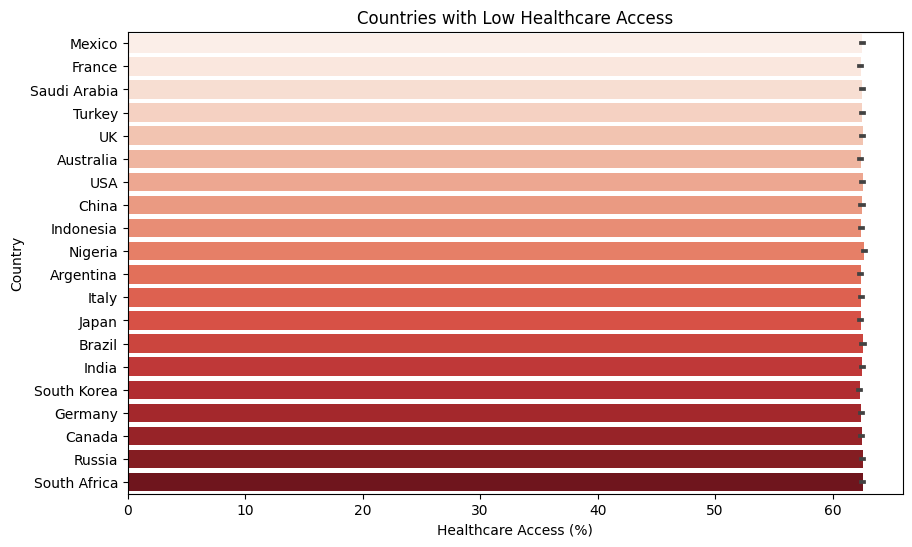

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Healthcare Access (%)', 
    y='Country', 
    data=priority_countries.sort_values('Healthcare Access (%)'),
    palette='Reds'
)
plt.title('Countries with Low Healthcare Access')
plt.xlabel('Healthcare Access (%)')
plt.ylabel('Country')
plt.show()

# 2. Epidemiological Studies

In [6]:
df['Prevalence Rate (%)'].describe()

count    1000000.000000
mean          10.047992
std            5.740189
min            0.100000
25%            5.090000
50%           10.040000
75%           15.010000
max           20.000000
Name: Prevalence Rate (%), dtype: float64

In [7]:
df['Per Capita Income (USD)'].describe()

count    1000000.000000
mean       50311.099835
std        28726.959359
min          500.000000
25%        25457.000000
50%        50372.000000
75%        75195.000000
max       100000.000000
Name: Per Capita Income (USD), dtype: float64

In [8]:
df['Education Index'].describe()

count    1000000.000000
mean           0.650069
std            0.144472
min            0.400000
25%            0.530000
50%            0.650000
75%            0.780000
max            0.900000
Name: Education Index, dtype: float64

In [9]:
df['Urbanization Rate (%)'].describe()

count    1000000.000000
mean          54.985212
std           20.214042
min           20.000000
25%           37.470000
50%           54.980000
75%           72.510000
max           90.000000
Name: Urbanization Rate (%), dtype: float64

In [11]:
# Korelation Calculate
correlation_matrix = df[['Prevalence Rate (%)', 'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)']].corr()

print("Corelation between Prevalence Rate and socio-economic factors:")
print(correlation_matrix['Prevalence Rate (%)'])

Corelation between Prevalence Rate and socio-economic factors:
Prevalence Rate (%)        1.000000
Per Capita Income (USD)    0.001049
Education Index           -0.000185
Urbanization Rate (%)      0.002334
Name: Prevalence Rate (%), dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


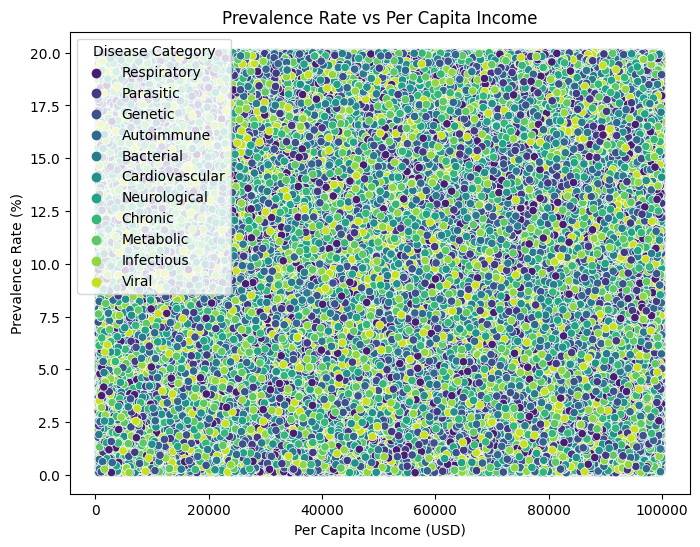

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Per Capita Income (USD)', 
    y='Prevalence Rate (%)', 
    data=df, 
    hue='Disease Category', 
    palette='viridis'
)
plt.title('Prevalence Rate vs Per Capita Income')
plt.xlabel('Per Capita Income (USD)')
plt.ylabel('Prevalence Rate (%)')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


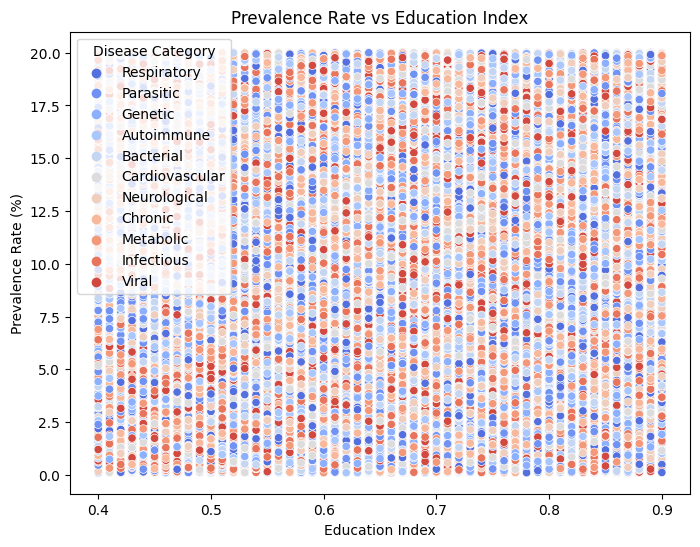

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Education Index', 
    y='Prevalence Rate (%)', 
    data=df, 
    hue='Disease Category', 
    palette='coolwarm'
)
plt.title('Prevalence Rate vs Education Index')
plt.xlabel('Education Index')
plt.ylabel('Prevalence Rate (%)')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


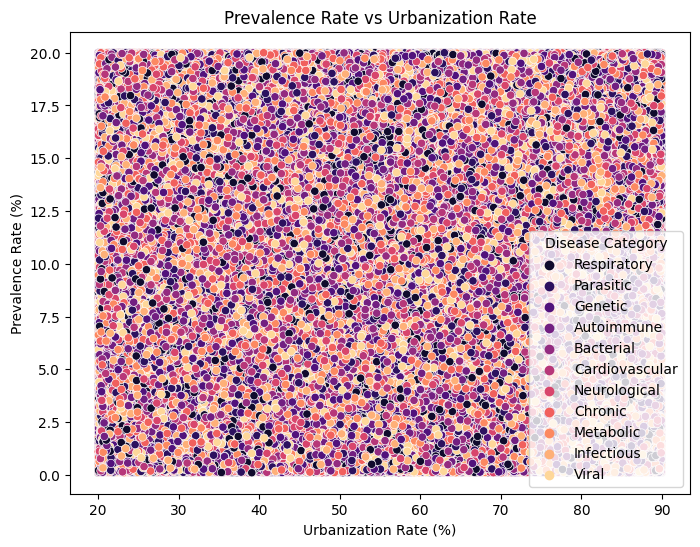

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Urbanization Rate (%)', 
    y='Prevalence Rate (%)', 
    data=df, 
    hue='Disease Category', 
    palette='magma'
)
plt.title('Prevalence Rate vs Urbanization Rate')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Prevalence Rate (%)')
plt.show()

# 3. Global Health Research

In [16]:
# Let's make an example:
# - Threshold for high prevalence = 15
# - Threshold to be able to access low health = 60
# - High mortality rate threshold = 5
# - Threshold for low income = 10000

high_prevalence_threshold = 15
low_healthcare_access_threshold = 60
high_mortality_threshold = 5
low_income_threshold = 10000

priority_regions = df[
    (df['Prevalence Rate (%)'] >= high_prevalence_threshold) &
    (df['Healthcare Access (%)'] <= low_healthcare_access_threshold) &
    (df['Mortality Rate (%)'] >= high_mortality_threshold) &
    (df['Per Capita Income (USD)'] <= low_income_threshold)
]

print("Regions in need of public health interventions:")
print(priority_regions[['Country', 'Prevalence Rate (%)', 'Healthcare Access (%)', 'Mortality Rate (%)', 'Per Capita Income (USD)']])

Regions in need of public health interventions:
             Country  Prevalence Rate (%)  Healthcare Access (%)  \
653            India                18.40                  59.38   
726            China                15.05                  56.77   
1019           Italy                19.03                  50.90   
1503    South Africa                17.57                  50.47   
1548       Argentina                17.46                  50.55   
...              ...                  ...                    ...   
997437        Canada                15.68                  51.27   
998071        Canada                19.98                  52.84   
998869           USA                17.57                  58.52   
999421     Australia                17.64                  57.95   
999765       Nigeria                19.49                  55.35   

        Mortality Rate (%)  Per Capita Income (USD)  
653                   8.09                     1226  
726                   8.39 

In [19]:
# The highest prevalence of disease
top_diseases = priority_regions.groupby('Disease Name')['Prevalence Rate (%)'].mean().sort_values(ascending=False).head(10)
print("Major diseases in priority regions:")
print(top_diseases)

Major diseases in priority regions:
Disease Name
Polio                  17.584314
Cholera                17.582832
Malaria                17.546000
Alzheimer's Disease    17.537479
Leprosy                17.531835
Dengue                 17.495825
Cancer                 17.479658
Hepatitis              17.458293
Hypertension           17.458100
Zika                   17.435639
Name: Prevalence Rate (%), dtype: float64


In [21]:
# Analysis of age groups and gender in priority regions
vulnerable_groups = priority_regions.groupby(['Age Group', 'Gender'])['Prevalence Rate (%)'].mean().sort_values(ascending=False)
print("Vulnerable groups in priority regions:")
print(vulnerable_groups)

Vulnerable groups in priority regions:
Age Group  Gender
19-35      Other     17.741182
           Male      17.664563
           Female    17.447364
0-18       Other     17.434950
36-60      Female    17.432589
           Male      17.419340
61+        Female    17.376546
           Other     17.365938
0-18       Male      17.343156
61+        Male      17.326010
0-18       Female    17.315526
36-60      Other     17.264531
Name: Prevalence Rate (%), dtype: float64
